In [2]:
import numpy as np
import scipy.signal as sig
import soundfile as sf
import matplotlib.pyplot as plt

# Shelfing Filter (Kuhschwanzfilter in German)

Shelfing filter are defined by their behavior at 0Hz (lowShelf) and $f_s/2$ (highShelf). A simple way to design shelfing filters is by adding a lowpass or highpass design with 1. Lowpass example
$$ H(s) = \frac{V_0} {s +1} +1 $$
where $V_0$ is a helping variable, leading to
$$ H(s) = \frac{s + (\overbrace{V_0+1}^{g})}{s + 1} $$
For attenuation switch numerator and denominator

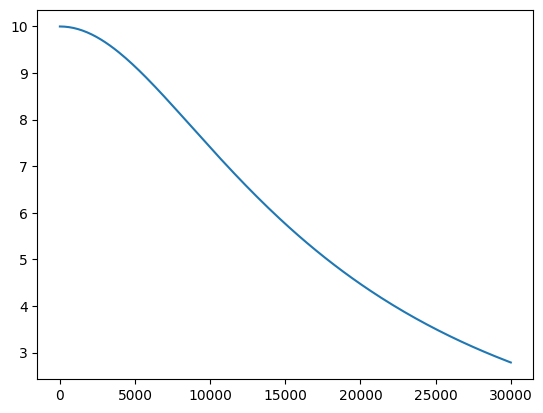

In [3]:
# lowshelf first order analog

def get_lowshelf_firstorder_analog(freq_Hz, gain_dB):
    om = 2*np.pi*freq_Hz
    if gain_dB >= 0:
        g = 10**(gain_dB/20)
        d_norm = [1, g]
        c_norm = [1, 1]
        d , c = sig.lp2lp(d_norm,c_norm,om)
    else:
        g = 10**(-gain_dB/20)
        d_norm = [1, g]
        c_norm = [1, 1]

        d , c = sig.lp2lp(c_norm,d_norm,om)
    return d,c

freq = 10000
gain_dB = 10

d,c = get_lowshelf_firstorder_analog(freq,gain_dB)
freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
w, tf = sig.freqs(d, c, freq_vec)
fig, ax = plt.subplots()
ax.plot(w/(2*np.pi), 20*np.log10(np.abs(tf)))


## second order filter

to design a second order filter two steps are necessary

1. design two first order filters
2. adjust the attenuation



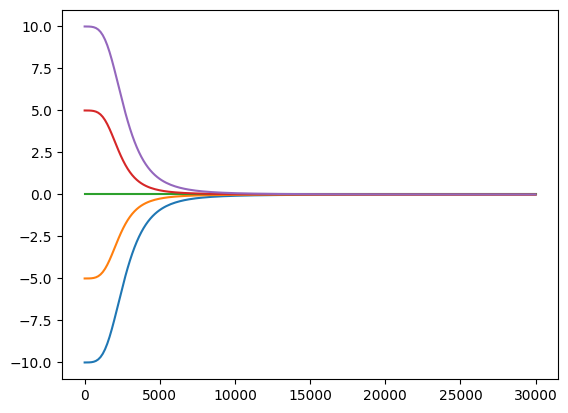

In [21]:
def get_lowshelf_secondorder_analog(freq_Hz, gain_dB, Q = 1/np.sqrt(2)):
    om = 2*np.pi*freq_Hz
    if gain_dB >= 0:
        g = 10**(gain_dB/20)
        d_norm = [1, np.sqrt(g)/Q, g]
        c_norm = [1, 1/Q, 1]
        d , c = sig.lp2lp(d_norm,c_norm,om)
    else:
        g = 10**(-gain_dB/20)
        d_norm = [1, np.sqrt(g)/Q, g]
        c_norm = [1, 1/Q, 1]

        d , c = sig.lp2lp(c_norm,d_norm,om)
    return d,c

freq = 2000
gain_dB = np.linspace(-10,10,num=5)
Q = 0.7

fig, ax = plt.subplots()

for kk,one_gain in enumerate(gain_dB):
    d,c = get_lowshelf_secondorder_analog(freq,one_gain,Q)
    freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
    w , tf = sig.freqs(d, c, freq_vec)
    ax.plot(w/(2*np.pi), 20*np.log10(np.abs(tf)))


## better solution 

the design needs a switch for amplification and attenuation.
A better and symmetric design is given by
$$ H(s) = A \frac{s^2 + \frac{\sqrt{A}}{Q} + A}{As^2 + \frac{\sqrt{A}}{Q} + 1} $$
with $A = 10^gain_dB/40$



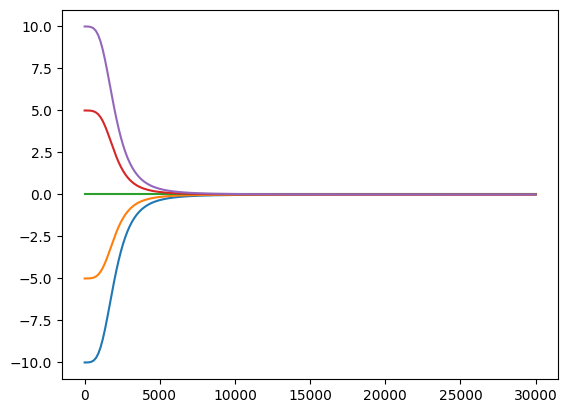

In [24]:
def get_lowshelf_secondorder_analogRBJ(freq_Hz, gain_dB, Q = 1/np.sqrt(2)):
    om = 2*np.pi*freq_Hz
    A = 10**(gain_dB/40)
    d_norm = [A, A*np.sqrt(A)/Q, A*A]
    c_norm = [A, np.sqrt(A)/Q, 1]
    d , c = sig.lp2lp(d_norm,c_norm,om)

    return d,c

freq = 2000
gain_dB = np.linspace(-10,10,num=5)
Q = 0.7

fig, ax = plt.subplots()

for kk,one_gain in enumerate(gain_dB):
    d,c = get_lowshelf_secondorder_analogRBJ(freq,one_gain,Q)
    freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
    w , tf = sig.freqs(d, c, freq_vec)
    ax.plot(w/(2*np.pi), 20*np.log10(np.abs(tf)))


## High shelfing

for high shelfing filter only the lowpass to lowpass transformation is exchanged with a lowpass highpass transformation


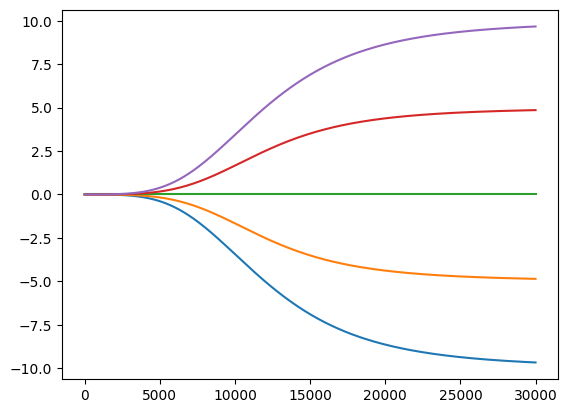

In [28]:
def get_highshelf_secondorder_analogRBJ(freq_Hz, gain_dB, Q = 1/np.sqrt(2)):
    om = 2*np.pi*freq_Hz
    A = 10**(gain_dB/40)
    d_norm = [A, A*np.sqrt(A)/Q, A*A]
    c_norm = [A, np.sqrt(A)/Q, 1]
    d , c = sig.lp2hp(d_norm,c_norm,om)

    return d,c

freq = 12000
gain_dB = np.linspace(-10,10,num=5)
Q = 0.7

fig, ax = plt.subplots()

for kk,one_gain in enumerate(gain_dB):
    d,c = get_highshelf_secondorder_analogRBJ(freq,one_gain,Q)
    freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
    w , tf = sig.freqs(d, c, freq_vec)
    ax.plot(w/(2*np.pi), 20*np.log10(np.abs(tf)))
